In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [40]:
df = pd.read_csv('course_lead_scoring.csv')

In [7]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [10]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [41]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

In [42]:
df[numerical_features] = df[numerical_features].fillna(0)
df[categorical_features] = df[categorical_features].fillna("NA")

In [13]:
# Number of missing values, percentage of missing values and data types
pd.DataFrame(
    {
        "missing_values": df.isnull().sum(),
        "missing_perc": round(df.isnull().mean() * 100, 2),
        "types": df.dtypes,
    }
)

,missing_values,missing_perc,types
lead_source,0,0.0,object
industry,0,0.0,object
number_of_courses_viewed,0,0.0,int64
annual_income,0,0.0,float64
employment_status,0,0.0,object
location,0,0.0,object
interaction_count,0,0.0,int64
lead_score,0,0.0,float64
converted,0,0.0,int64


In [ ]:
Question 1
What is the most frequent observation (mode) for the column industry?

NA
technology
healthcare
retail

In [14]:
print(f"Mode of the industry feature is {df.industry.mode().values[0]}")

Mode of the industry feature is retail


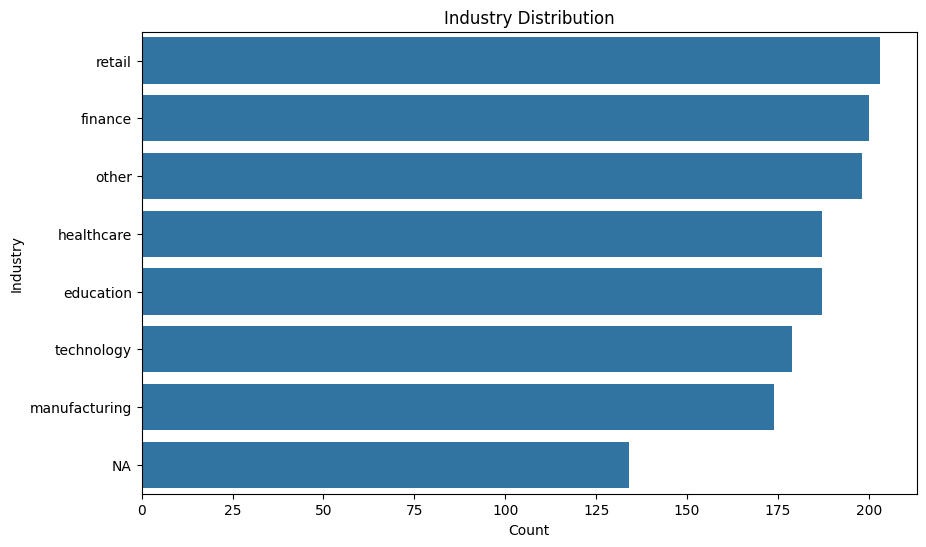

In [43]:
# Distribution of the industry feature
plt.figure(figsize=(10, 6))
sns.barplot(x=df.industry.value_counts().values, y=df.industry.value_counts().index)
plt.title("Industry Distribution")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()

In [ ]:
Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

interaction_count and lead_score
number_of_courses_viewed and lead_score
number_of_courses_viewed and interaction_count
annual_income and interaction_count
Only consider the pairs above when answering this question.

Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value converted is not in your dataframe.

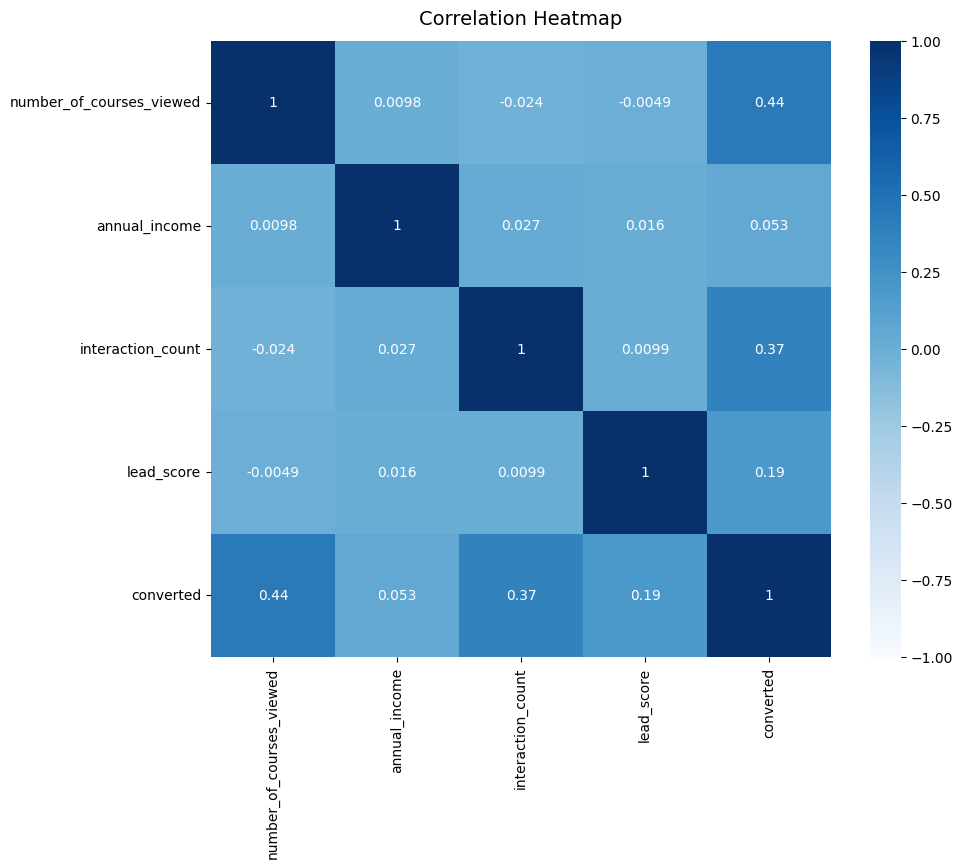

In [44]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    df[numerical_features].corr(method="pearson"),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=sns.color_palette("Blues", as_cmap=True),
)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 14}, pad=12);

In [45]:
# Train, test, validation split
full_train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=42)
len(train_df), len(val_df), len(test_df)

(876, 293, 293)

In [46]:
# Prepare data for modeling
target = "converted"
features = numerical_features + categorical_features
features.remove(target)

# Training set
X_train = train_df[features].reset_index(drop=True)
y_train = train_df[target].reset_index(drop=True)

# Validation set
X_val = val_df[features].reset_index(drop=True)
y_val = val_df[target].reset_index(drop=True)

# Test set
X_test = test_df[features].reset_index(drop=True)
y_test = test_df[target].reset_index(drop=True)

In [ ]:
Question 3
Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the biggest mutual information score?

industry
location
lead_source
employment_status

In [47]:
def mutual_info_score_converted(series):
    return mutual_info_score(series, y_train)

In [48]:
mi = X_train[categorical_features].apply(mutual_info_score_converted)
mi.sort_values(ascending=False)

round(mi, 3)

lead_source          0.035
industry             0.012
employment_status    0.013
location             0.004
dtype: float64

In [49]:
print(f"Biggest mutual information score is {mi.max():.3f} for the feature {mi.idxmax()}")

Biggest mutual information score is 0.035 for the feature lead_source


In [ ]:
Question 4
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

0.64
0.74
0.84
0.94

In [50]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(X_train.to_dict(orient="records"))
X_val = dv.transform(X_val.to_dict(orient="records"))
X_test = dv.transform(X_test.to_dict(orient="records"))

X_train.shape, X_val.shape, X_test.shape

((876, 31), (293, 31), (293, 31))

In [53]:
# Logistic Regression
model = LogisticRegression(solver='liblinear')

In [54]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [55]:
model.intercept_

array([-0.06914728])

In [56]:
model.coef_.round(3)

array([[-0.   , -0.015,  0.034,  0.003,  0.012, -0.103, -0.025,  0.049,
        -0.02 , -0.013, -0.003, -0.009, -0.032, -0.016,  0.311,  0.051,
         0.02 , -0.012, -0.012, -0.115,  0.08 , -0.03 ,  0.004, -0.011,
        -0.011, -0.006,  0.008,  0.006, -0.033, -0.025,  0.454]])

In [57]:
y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = y_pred >= 0.5

In [58]:
original_accuracy = (converted_decision == y_val).mean()
print(f"Model Accuracy (with all features): {original_accuracy:.4f}\n")

Model Accuracy (with all features): 0.6997



In [ ]:
Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model using the same features and parameters as in Q4 (without rounding).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

'industry'

'employment_status'

'lead_score'

Note: The difference doesn't have to be positive.

In [59]:
accuracy_differences = {}

In [60]:
for feature in features:
    # Logistic Regression Model
    iter_model = LogisticRegression(
        solver="liblinear", C=1.0, max_iter=1_000, random_state=42
    )

    # Features to keep
    features_to_keep = [f for f in features if f != feature]

    # Training and Validation Set
    X_train_iter = train_df[features_to_keep].reset_index(drop=True)
    X_val_iter = val_df[features_to_keep].reset_index(drop=True)

    dv_iter = DictVectorizer(sparse=False)

    # One-hot encoding
    X_train_iter = dv_iter.fit_transform(X_train_iter.to_dict(orient="records"))
    X_val_iter = dv_iter.transform(X_val_iter.to_dict(orient="records"))

    # Training model on subset of features
    iter_model.fit(X_train_iter, y_train)

    y_pred_iter = iter_model.predict_proba(X_val_iter)[:, 1]
    decision_iter = y_pred_iter >= 0.5
    iter_accuracy = (decision_iter == y_val).mean()

    # Calculate and store the difference
    diff = np.abs(original_accuracy - iter_accuracy)
    accuracy_differences[feature] = diff

    print(
        f"Model without {feature:<24}| Accuracy = {iter_accuracy:.4f}| Absolute Difference = {diff:.4f}"
    )

Model without number_of_courses_viewed| Accuracy = 0.5563| Absolute Difference = 0.1433
Model without annual_income           | Accuracy = 0.8532| Absolute Difference = 0.1536
Model without interaction_count       | Accuracy = 0.5563| Absolute Difference = 0.1433
Model without lead_score              | Accuracy = 0.7065| Absolute Difference = 0.0068
Model without lead_source             | Accuracy = 0.7031| Absolute Difference = 0.0034
Model without industry                | Accuracy = 0.6997| Absolute Difference = 0.0000
Model without employment_status       | Accuracy = 0.6962| Absolute Difference = 0.0034
Model without location                | Accuracy = 0.7099| Absolute Difference = 0.0102


In [61]:
# Least useful feature
least_useful_feat = min(accuracy_differences, key=accuracy_differences.get)
print(f"The least useful feature is: '{least_useful_feat}'")

The least useful feature is: 'industry'


In [ ]:
Question 6
Now let's train a regularized logistic regression.
Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
Train models using all the features as in Q4.
Calculate the accuracy on the validation dataset and round it to 3 decimal digits.
Which of these C leads to the best accuracy on the validation set?

0.01
0.1
1
10
100

In [62]:
# Regularization values
reg_values = [0.01, 0.1, 1, 10, 100]

accuracy_reg_values = {}

for C in reg_values:
    # Logistic Regression
    model_reg = LogisticRegression(
        solver="liblinear", C=C, max_iter=1_000, random_state=42
    )
    # Train the model
    model_reg.fit(X_train, y_train)

    # Calculate predictions
    y_pred_reg = model_reg.predict_proba(X_val)[:, 1]
    decision_reg = y_pred_reg >= 0.5
    reg_accuracy = (decision_reg == y_val).mean()

    # Fill the accuracy_reg_values dictionary
    accuracy_reg_values[C] = reg_accuracy

    print(f"Regularization parameter: {C:>4}| Accuracy = {reg_accuracy:.3f}")

Regularization parameter: 0.01| Accuracy = 0.700
Regularization parameter:  0.1| Accuracy = 0.700
Regularization parameter:    1| Accuracy = 0.700
Regularization parameter:   10| Accuracy = 0.700
Regularization parameter:  100| Accuracy = 0.700
